In [ ]:
# コード4.1 家計調査年報データの読み込み
import pandas as pd  # 表形式のデータを扱うために pandas を使用する
kakei = pd.read_csv("kakei.csv", encoding="Shift_JIS")  # 家計調査年報データを読み込む
kakei.head(12)  # 読み込んだデータの先頭から12行を表示

In [2]:
# コード4.2 米の支出金額の要約統計量の出力
import pandas as pd
kakei = pd.read_csv("kakei.csv", encoding="Shift_JIS")

# 米の支出金額の行を選択する
rice = kakei[kakei["収支分類区分3"] == "米"]
#print(rice)  # 選択したデータの確認時はコメントアウトを外すこと

# 要約統計量を出力する
rice.loc[:, "支出金額"].describe()

count      11.000000
mean     2129.272727
std       233.697279
min      1822.000000
25%      1916.500000
50%      2193.000000
75%      2283.000000
max      2485.000000
Name: 支出金額, dtype: float64

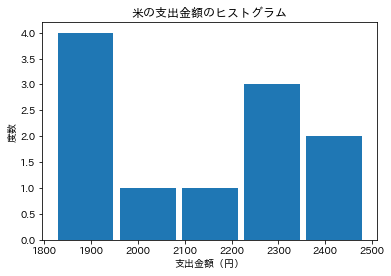

In [4]:
# コード4.3 米の支出金額の分布¶
import matplotlib.pyplot as plt # グラフを作成するために matplotlib を使用する
import japanize_matplotlib

# データの分布として支出金額のヒストグラムを描画する
plt.hist(rice["支出金額"], bins=5, rwidth=0.9) # bins は分布のグループ数、rwidth は棒の横幅
plt.title("米の支出金額のヒストグラム")
plt.xlabel("支出金額（円）")
plt.ylabel("度数")
plt.show()

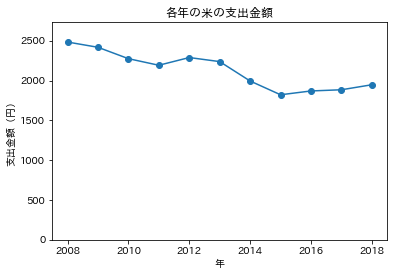

In [5]:
# コード4.4 米の支出金額の経年変化のグラフ描画
plt.plot(rice["調査年"], rice["支出金額"], marker='o')
plt.title("各年の米の支出金額")
plt.xlabel("年")
plt.ylabel("支出金額（円）")
y_max = max(rice["支出金額"])
plt.ylim(0, y_max * 1.1)
plt.show()

121         NaN
122   -0.026559
123   -0.059115
124   -0.036467
125    0.044232
126   -0.022271
127   -0.108977
128   -0.086717
129    0.026345
130    0.008021
131    0.033422
Name: 支出金額, dtype: float64


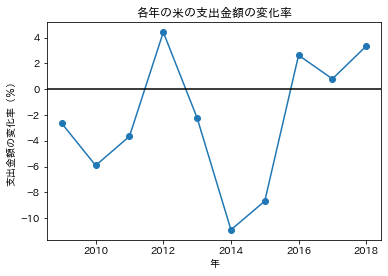

In [6]:
# コード4.5 米の支出金額の変化率の計算とグラフの描画
# 変化率の計算結果の表示
print(rice["支出金額"].pct_change())

# 変化率のグラフを描画する
plt.plot(rice["調査年"], rice["支出金額"].pct_change() * 100, marker='o')
plt.title("各年の米の支出金額の変化率")
plt.xlabel("年")
plt.ylabel("支出金額の変化率（％）")
plt.axhline(0, color="black")  # 変化率が 0 の位置に水平線を描画
plt.show()

In [7]:
# コード4.6 食料の支出金額の集計処理
import pandas as pd
kakei = pd.read_csv("kakei.csv", encoding="shift_jis")

# 調査年ごとに収支分類区分1（食料）で支出金額を合計
foods = kakei.groupby(["収支分類区分1", "調査年"], as_index=False).agg({"支出金額":sum})
foods

,収支分類区分1,調査年,支出金額
0,食料,2008,69002
1,食料,2009,68323
2,食料,2010,67566
3,食料,2011,66905
4,食料,2012,67276
5,食料,2013,68605
6,食料,2014,69925
7,食料,2015,71843
8,食料,2016,72936
9,食料,2017,72865


In [8]:
# コード4.7 穀類の支出金額の集計処理
# 穀類の行だけ選択して、調査年ごとに収支分類区分2で支出金額を合計
cereals = kakei[kakei["収支分類区分2"] == "穀類"]
cereals = cereals.groupby(["収支分類区分1", "収支分類区分2", "調査年"], as_index=False).agg({"支出金額":sum})
cereals

,収支分類区分1,収支分類区分2,調査年,支出金額
0,食料,穀類,2008,6582
1,食料,穀類,2009,6631
2,食料,穀類,2010,6373
3,食料,穀類,2011,6308
4,食料,穀類,2012,6355
5,食料,穀類,2013,6243
6,食料,穀類,2014,6150
7,食料,穀類,2015,6137
8,食料,穀類,2016,6181
9,食料,穀類,2017,6143


In [9]:
# コード4.8 時系列データの基礎的な分析の関数化
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

def analyze(df, kubun_name):
    """
    支出金額データを時系列分析する関数
    df: 分析対象のデータ
    kubun_name: 分析対象の支出分類区分の名前
    """
    # 要約統計量
    print(df["支出金額"].describe())

    # データの分布
    plt.hist(df["支出金額"], bins=5, rwidth=0.9)
    plt.title(kubun_name + "の支出金額のヒストグラム")
    plt.xlabel("支出金額（円）")
    plt.ylabel("度数")
    plt.show()

    # 年ごとの支出金額
    plt.plot(df["調査年"], df["支出金額"], marker='o')
    plt.title("各年の"+ kubun_name + "の支出金額")
    plt.xlabel("年")
    plt.ylabel(kubun_name + "の支出金額（円）")
    y_max = max(df["支出金額"])
    plt.ylim(0, y_max * 1.1)
    plt.show()

count       11.000000
mean     69929.272727
std       2542.873575
min      66905.000000
25%      67944.500000
50%      69002.000000
75%      72354.000000
max      73976.000000
Name: 支出金額, dtype: float64


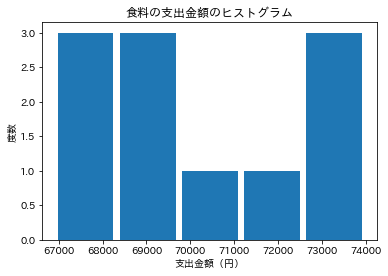

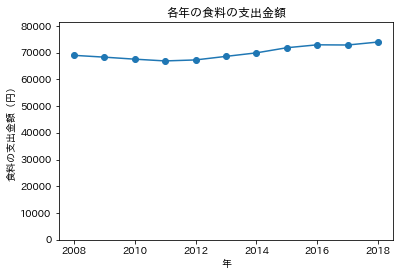

count      11.000000
mean     6306.181818
std       170.128080
min      6137.000000
25%      6165.500000
50%      6265.000000
75%      6364.000000
max      6631.000000
Name: 支出金額, dtype: float64


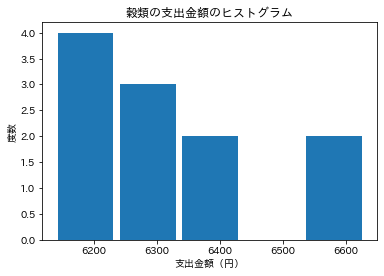

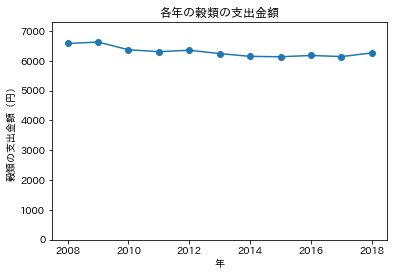

count      11.000000
mean     2129.272727
std       233.697279
min      1822.000000
25%      1916.500000
50%      2193.000000
75%      2283.000000
max      2485.000000
Name: 支出金額, dtype: float64


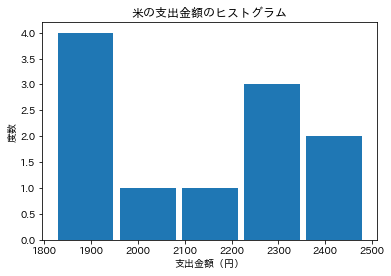

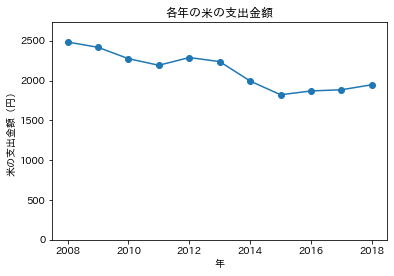

In [10]:
# コード4.9 関数 analyze を使った基礎的な分析
kakei = pd.read_csv("kakei.csv", encoding="Shift_JIS")

# 食料の基礎的な分析
foods = kakei.groupby(["収支分類区分1", "調査年"], as_index=False).agg({"支出金額":sum})
analyze(foods, "食料")

# 穀類の基礎的な分析
cereals = kakei[kakei["収支分類区分2"] == "穀類"]
cereals = cereals.groupby(["収支分類区分1", "収支分類区分2", "調査年"], as_index=False).agg({"支出金額":sum})
analyze(cereals, "穀類")

# 米の基礎的な分析
rice = kakei[kakei["収支分類区分3"] == "米"]
analyze(rice, "米")

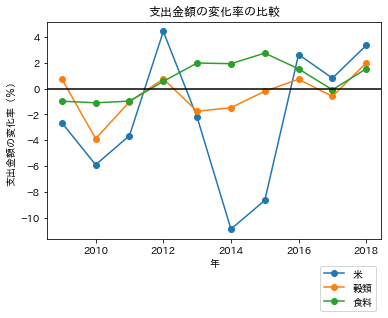

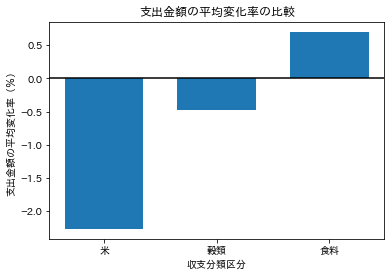

In [11]:
# コード4.10 変化率を比較するグラフの描画
# それぞれの変化率を折れ線グラフで表示する
plt.plot(rice["調査年"], rice["支出金額"].pct_change() * 100, marker='o', label="米")
plt.plot(cereals["調査年"], cereals["支出金額"].pct_change() * 100, marker='o', label="穀類")
plt.plot(foods["調査年"], foods["支出金額"].pct_change() * 100, marker='o', label="食料")
plt.title("支出金額の変化率の比較")
plt.xlabel("年")
plt.ylabel("支出金額の変化率（％）")
plt.legend(bbox_to_anchor=(1, -0.1), loc='upper right')
plt.axhline(0, color="black")
plt.show()

# それぞれの平均変化率を求める
mean_foods = foods["支出金額"].pct_change().mean() * 100
mean_cereals = cereals["支出金額"].pct_change().mean() * 100
mean_rice = rice["支出金額"].pct_change().mean() * 100
means = {"米":mean_rice, "穀類":mean_cereals, "食料":mean_foods}
## 棒グラフで表示する
plt.bar(x = means.keys(), height = means.values(), width = 0.7)
plt.title("支出金額の平均変化率の比較")
plt.xlabel("収支分類区分")
plt.ylabel("支出金額の平均変化率（％）")
plt.axhline(0, color="black")
plt.show()

移動平均の項数を入力してください：3
調査年
2008            NaN
2009    2393.333333
2010    2296.000000
2011    2253.000000
2012    2240.666667
2013    2174.666667
2014    2018.666667
2015    1895.666667
2016    1859.000000
2017    1901.000000
2018            NaN
Name: 支出金額, dtype: float64


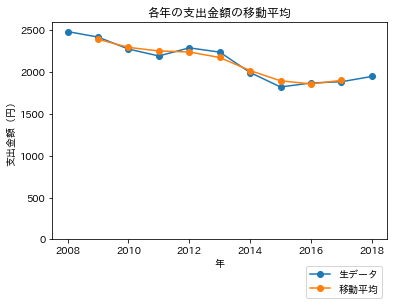

In [2]:
# コード4.11 支出金額の移動平均の計算
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# 家計調査年報データを読み込む
kakei = pd.read_csv("kakei.csv", encoding="Shift_JIS")

# 米の支出金額のみを取り出す
rice = kakei[kakei["収支分類区分3"] == "米"]

# 項数に応じて期間の中心の年の支出金額の移動平均を計算
rice.index = rice["調査年"]
n = int(input("移動平均の項数を入力してください："))
ma_rice = rice["支出金額"].rolling(n, center=True).mean()
print(ma_rice)

# 年ごとの支出金額
## 元データの描画設定
plt.plot(rice.index, rice["支出金額"], label="生データ", marker='o')
## 移動平均を求めたデータの描画設定
plt.plot(ma_rice.index, ma_rice, label="移動平均", marker='o')
## グラフの要素設定
plt.title("各年の支出金額の移動平均")
plt.xlabel("年")
plt.ylabel("支出金額（円）")
plt.ylim(0, 2600)
plt.legend(bbox_to_anchor=(1, -0.1), loc='upper right')
plt.show()

移動平均の項数を入力してください：4
調査年
2008        NaN
2009        NaN
2010    2343.25
2011    2294.50
2012    2249.50
2013    2179.25
2014    2086.50
2015    1981.50
2016    1893.00
2017    1881.25
2018        NaN
Name: 支出金額, dtype: float64


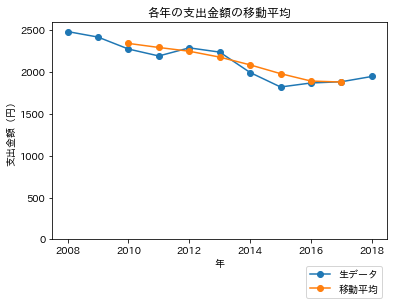

In [3]:
# コード4.11 支出金額の移動平均の計算
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# 家計調査年報データを読み込む
kakei = pd.read_csv("kakei.csv", encoding="Shift_JIS")

# 米の支出金額のみを取り出す
rice = kakei[kakei["収支分類区分3"] == "米"]

# 項数に応じて期間の中心の年の支出金額の移動平均を計算
rice.index = rice["調査年"]
n = int(input("移動平均の項数を入力してください："))
ma_rice = rice["支出金額"].rolling(n, center=True).mean()
print(ma_rice)

# 年ごとの支出金額
## 元データの描画設定
plt.plot(rice.index, rice["支出金額"], label="生データ", marker='o')
## 移動平均を求めたデータの描画設定
plt.plot(ma_rice.index, ma_rice, label="移動平均", marker='o')
## グラフの要素設定
plt.title("各年の支出金額の移動平均")
plt.xlabel("年")
plt.ylabel("支出金額（円）")
plt.ylim(0, 2600)
plt.legend(bbox_to_anchor=(1, -0.1), loc='upper right')
plt.show()

調査年
2008         NaN
2009         NaN
2010         NaN
2011   -2.080444
2012   -1.961212
2013   -3.122916
2014   -4.256051
2015   -5.032351
2016   -4.466313
2017   -0.620708
2018         NaN
Name: 支出金額, dtype: float64


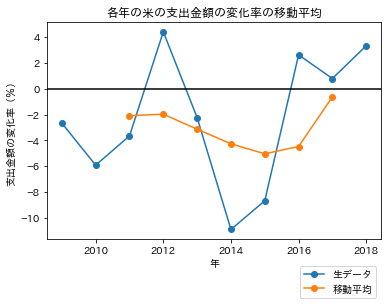

In [4]:
# コード4.12 支出金額の変化率の移動平均の計算
# 支出金額の変化率を計算する
raw = rice["支出金額"].pct_change() * 100
ma_change = ma_rice.pct_change() * 100
ma_change[2018] = None # 変化率の計算で最後の年が 0 になるため無効にする
print(ma_change)

## 変化率のグラフを描画する
plt.plot(raw.index, raw, label="生データ", marker='o')
plt.plot(ma_change.index, ma_change, label="移動平均", marker = 'o')
plt.title("各年の米の支出金額の変化率の移動平均")
plt.xlabel("年")
plt.ylabel("支出金額の変化率（％）")
plt.legend(bbox_to_anchor=(1, -0.1), loc='upper right')
plt.axhline(0, color="black")
plt.show()

In [5]:
# コード4.13 指数平滑法による予測値を計算する関数
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

def calc_forecasted_value(df, alpha):
    """
    指数平滑法を用いて予測値を計算する関数
    """
    # データフレームのコピーを作成
    res = df.copy()
    # 時間の列をインデックスに設定
    res.index = res["調査年"]
    
    # 予測値を格納する辞書（キー：調査年）
    forecasted = {res.index[0]: np.nan}  # 最初の年は予測できないので NaN
    forecasted[res.index[1]] = res.at[res.index[0], "支出金額"]  # 最初の年の値を次の年の予測値とする
    # 予測値を順次求めていく
    for t in range(2, len(res)):
        pre_year = res.index[t - 1]
        year_t = res.index[t]
        forecasted[year_t] = alpha * res.at[pre_year, "支出金額"] + (1 - alpha) * forecasted[pre_year]
    
    # 辞書の値（予測値）を列として追加
    res.loc[:, "予測値"] = forecasted.values()
    # 予測値と実測値から予測誤差を計算
    res["予測誤差"] = abs(res["支出金額"] - res["予測値"])
    
    return res

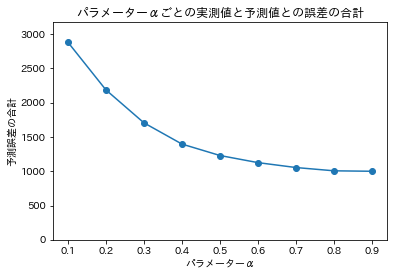

In [6]:
# コード4.14 係数  𝛼  ごとの予測誤差の合計値の計算
# 家計調査年報データを読み込む
kakei = pd.read_csv("kakei.csv", encoding="Shift_JIS")

# 米の支出金額のみを取り出す
rice = kakei[kakei["収支分類区分3"] == "米"]

# 予測のパラメータ α の候補
param_alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# パラメータごとの予測誤差の合計の辞書
total_error = {}
# パラメータを変えながら予測
for alpha in param_alpha:
    ## 予測値を計算する
    rice_f = calc_forecasted_value(rice, alpha)
    ## 予測誤差の合計値を計算して辞書へ追加
    te = sum(rice_f.loc[rice_f.index[1:], "予測誤差"])  # 最初の年は NaN なので除外
    total_error[str(alpha)] = te  # αの値を文字列化して辞書のキーとする
    
    """
    ## - - この部分のコメントアウトを外すとαごとの予測値のグラフを描画 - -
    ## 年ごとの消費支出と予測値を比較するグラフを描画する
    ### 元データの描画設定
    plt.plot(rice_f.index, rice_f["支出金額"], label="実測値", marker='o')
    ### 予測値の描画設定
    plt.plot(rice_f.index, rice_f["予測値"], label="予測値 (α = " + str(alpha) + ")", marker='o')
    ### グラフの要素設定
    plt.title("各年の米の支出金額")
    plt.xlabel("年")
    plt.ylabel("支出金額（円）")
    plt.ylim(0, 2600)
    plt.legend(bbox_to_anchor=(1, -0.1), loc='upper right')
    plt.show()
    """

# グラフ描画のために pandas.Series へ変換
res = pd.Series(total_error)
# パラメータ α ごとの予測誤差を描画
plt.plot(res.index, res, marker='o')
plt.title("パラメーターαごとの実測値と予測値との誤差の合計")
plt.xlabel("パラメーターα")
plt.ylabel("予測誤差の合計")
plt.ylim(0, max(res) * 1.1)
plt.show()

予測パラメーターα (0 < α < 1) を入力してください ==> 0.5


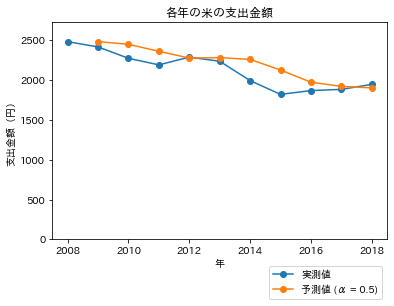

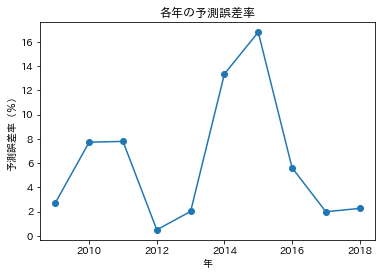

α = 0.5のとき：
2019年の米の消費支出の予測値 = 1925.89453125
2019年の実測値との誤差 = 68.89453125
2019年の実測値との誤差率（%） = 3.70999091276252


In [7]:
# コード4.15 次の年の支出金額の予測
# αを入力して予測値を計算する
alpha = float(input("予測パラメーターα (0 < α < 1) を入力してください ==> "))

kakei = pd.read_csv("kakei.csv", encoding="Shift_JIS")
rice = kakei[kakei["収支分類区分3"] == "米"]
rice_f = calc_forecasted_value(rice, alpha)

# 年ごとの支出金額と予測値を比較するグラフを描画する
plt.plot(rice_f.index, rice_f["支出金額"], label="実測値", marker='o')
plt.plot(rice_f.index, rice_f["予測値"], label="予測値 (α = " + str(alpha) + ")", marker='o')
## グラフの要素設定
plt.title("各年の米の支出金額")
plt.xlabel("年")
plt.ylabel("支出金額（円）")
plt.ylim(0, max(rice_f["支出金額"]) * 1.1)
plt.legend(bbox_to_anchor=(1, -0.1), loc='upper right')
plt.show()

# 年ごとの実測値における絶対誤差の割合（誤差率）を描画する
### 元データの描画設定
plt.plot(rice_f.index, rice_f["予測誤差"] / rice_f["支出金額"] * 100, marker='o')
plt.title("各年の予測誤差率")
plt.xlabel("年")
plt.ylabel("予測誤差率（％）")
plt.show()

# 次の年の消費支出を予測する
## 最新データの行番号
last_year = rice_f.index[-1]
## 予測値を計算する
forecasted = alpha * rice_f.at[last_year, "支出金額"] + (1 - alpha) * rice_f.at[last_year, "予測値"]
## 計算結果を表示する
print("α = " + str(alpha) + "のとき：")
print("2019年の米の消費支出の予測値 = " + str(forecasted))

ans = 1857  # 2019年の実測値
print("2019年の実測値との誤差 = " + str(abs(ans - forecasted)))
print("2019年の実測値との誤差率（%） = " + str(abs(ans - forecasted) / ans * 100))